In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)
크롤링=pd.read_csv('data/장애인스포츠강좌이용권_크롤링(좌표).csv',encoding='cp949')

In [2]:
# 자료형확인 
크롤링.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       1108 non-null   int64  
 1   시설명      1108 non-null   object 
 2   대표자      1102 non-null   object 
 3   연락처      1108 non-null   object 
 4   주소       1108 non-null   object 
 5   지도자      1108 non-null   object 
 6   시설면적     1108 non-null   object 
 7   운동종류     1108 non-null   object 
 8   장애종류     1108 non-null   object 
 9   강의명      1108 non-null   object 
 10  시간       1108 non-null   object 
 11  요일       1108 non-null   object 
 12  강사명      1098 non-null   object 
 13  기간       1108 non-null   object 
 14  차량지원     1108 non-null   object 
 15  장애 지원시설  666 non-null    object 
 16  수강료      1108 non-null   int64  
 17  경도       1108 non-null   float64
 18  위도       1108 non-null   float64
 19  상태       1108 non-null   object 
dtypes: float64(2), int64(2), object(16)
memory usage: 17

In [3]:
# 기타종목에 해당되는 강좌확인 
크롤링[크롤링['운동종류']=='기타종목'].loc[:,['운동종류','강의명']]['강의명'].value_counts().head(10)

[12월] 특수체육           43
[12월] 뉴스포츠            9
[12월] 그룹강좌            3
[12월] 컨디셔닝            3
[12월] 4구당구 입문(초보)     3
[12월] 보치아교실           3
[12월] 국술원 무술          3
[12월] 심리운동            3
[12월] 플라잉디스크B         2
[12월] 트램폴린            2
Name: 강의명, dtype: int64

In [4]:
# 강좌 종류 상위 10개 
크롤링['운동종류'].value_counts().head(10)

기타종목    255
태권도     215
수영      147
헬스      117
탁구       44
합기도      39
댄스       33
승마       31
요가       30
복싱       25
Name: 운동종류, dtype: int64

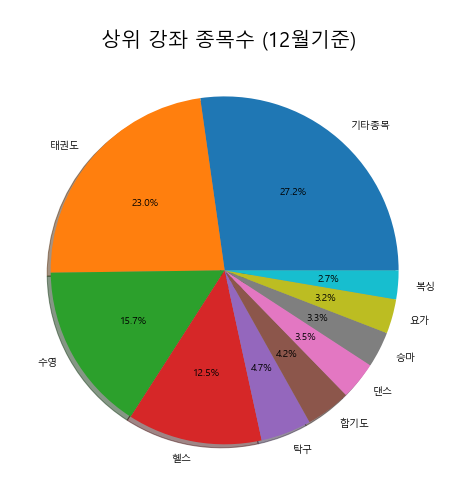

In [5]:
# 강좌 종류 상위 10개 시각화 
운동종목수=크롤링['운동종류'].value_counts().head(10)
plt.figure(figsize = (8, 8))
plt.pie(x=운동종목수,labels=운동종목수.index,autopct='%.1f%%',shadow=True)
plt.title('\n 상위 강좌 종목수 (12월기준)',fontsize=20)
plt.show()

In [6]:
# 실제부담금액 파생변수만들기 
크롤링['실금액']=크롤링['수강료']-80000
크롤링['실금액2']=크롤링['수강료']-80000

In [7]:
# 데이터값 구간화 
def 실금액(x):
    if x== 0 : return '무료강좌'
    elif x<50000 : return '5만원이하'
    elif x<100000 : return '10만원이하'
    else: return '10만원이상'


In [8]:
# 데이터값 구간화2
def 실금액2(x):
    if x<20000 : return '2만원이하'
    elif x<50000 : return '5만원이하'
    elif x<100000 : return '10만원이하'
    else: return '10만원이상'


In [9]:
크롤링['실금액'] = 크롤링['실금액'].apply(실금액)
크롤링['실금액2'] = 크롤링['실금액2'].apply(실금액2)

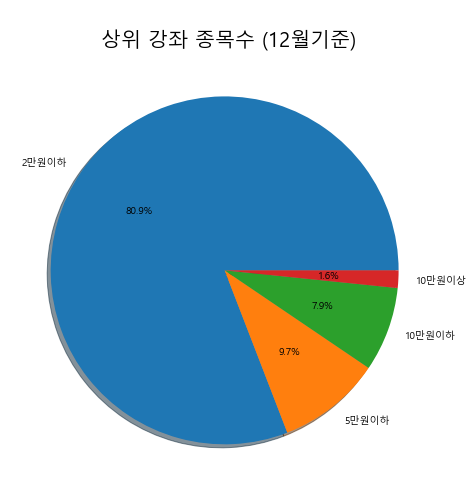

In [11]:
#  구간화2 적용후 시각화
실금액=크롤링['실금액2'].value_counts().head(10)
plt.figure(figsize = (8, 8))
plt.pie(x=실금액,labels=실금액.index,autopct='%.1f%%',shadow=True)
plt.title('\n 상위 강좌 종목수 (12월기준)',fontsize=20)
plt.show()

In [17]:
크롤링['실금액'].value_counts()

무료강좌      586
5만원이하     417
10만원이하     87
10만원이상     18
Name: 실금액, dtype: int64

In [12]:
크롤링_무료강좌=크롤링[크롤링['실금액']=='무료강좌']

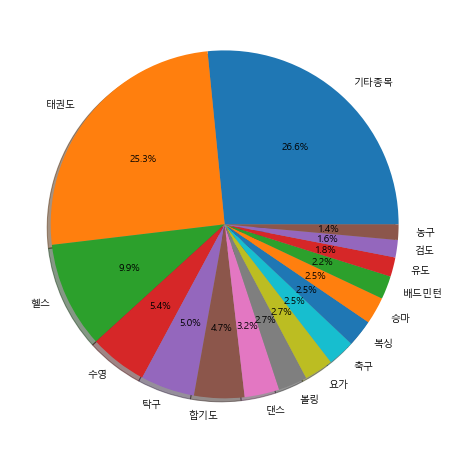

In [14]:
운동종목수=크롤링_무료강좌['운동종류'].value_counts().head(16)
plt.figure(figsize = (8, 8))
plt.pie(x=운동종목수,labels=운동종목수.index,autopct='%.1f%%',shadow=True)
# plt.title('\n 무료강좌종목비율',fontsize=20)
plt.show()

In [15]:
크롤링_무료강좌['운동종류'].unique()

array(['배드민턴', '기타종목', '복싱', '헬스', '롤러인라인', '수영', '농구', '태권도', '축구',
       '합기도', '댄스', '필라테스', '요가', '테니스', '골프', '탁구', '볼링', '유도', '빙상',
       '검도', '승마', '배구', '야구', '에어로빅', '발레'], dtype=object)